## TAREA: Kernel Ridge Regression (KRR)

## Realizado por Jesús Martínez Leal y Miguel Muñoz Blat

## 

Regresión no-lineal regularizada.

* Generar conjunto de entrenamiento para predecir la función seno. 
* Expandir entradas en potencias (matriz de Vandermonde) para el ajuste polinómico con el regresor lineal (LR) y regresor lineal regularizado (LRR)
* Obtener pesos optimos para LR, LRR y KRR
* Calcula la salida para datos de test [0,2pi]
* Representa la salida estimada y la deseada

Analiza los resultados:
* Modifica la constante de regularización.
* Modifica la anchura del kernel RBF.
* Modifica el orden del ajuste polinómico. 

### Manera "manual"

Empezamos generando el conjunto de entrenamiento para predecir la función seno.

In [1]:
import numpy as np

# Genero N datos de train
N = 12

#X = np.linspace(0, np.pi * 2.0, N)
rng = np.random.RandomState(4)
X_train = rng.uniform(0, np.pi * 2.0, N)[:, np.newaxis]
y_train = np.sin(X_train)
print(X_train.shape[0])

12


Entrenamos modelos lineales. Se incluirá regularización y la expansión en potencias (matriz de Vandermonde).

In [2]:
# Entreno modelos lineales

# Variable de entrada constante a uno para incluir bias en los pesos 
def addones(XX):
    return np.concatenate([np.ones((XX.shape[0], 1)), XX], axis = 1) # columna de unos al inicio

XX = X_train
M = 5 # M < 2 linear regression ; M >= 2 polynomic regression

for p in range(2, M + 1, 1): XX = np.concatenate([XX, X_train**p], axis = 1) # esto es para lo de matriz de Vandermonde

XX = addones(XX)
Y = y_train

# Regresión lineal sin regularización
Wlr = np.linalg.inv(XX.T.dot(XX)).dot(XX.T).dot(Y) # pesos del modelo óptimos (diapo 36/61) quitando la regularización

# Regresión lineal con regularización

l = 0.001 # constante de regularizacion (lambda)
I = np.eye(XX.shape[1])  # matriz identidad

Wlrr = np.linalg.inv(XX.T.dot(XX) + l * I).dot(XX.T).dot(Y) # pesos del modelo óptimos (diapo 36/61)

Entrenamos ahora los modelos no lineales. [KRR]

In [3]:
# Entreno modelo no lineal

from sklearn.metrics.pairwise import rbf_kernel

lk = 0.001 # constante de regularización (lambda)

gamma = 0.1 # inversa de la anchura del kernel
K = rbf_kernel(X_train, X_train, gamma = gamma) # matriz kernel de train
In = np.eye(K.shape[0])  #matriz identidad
alpha = np.linalg.inv(K + lk * In).dot(y_train) # pesos del modelo (diapo 37/61)

Pasamos a la etapa de predicción de nuestros modelos.

In [4]:
# Predicción
# Generamos datos de test

X = np.linspace(0, np.pi * 2.0, 100)[:, np.newaxis]
y = np.sin(X)

XX_test = X

for p in range(2, M + 1):
    XX_test = np.concatenate([XX_test, X ** p], axis = 1)
    
XX_test = addones(XX_test)


# Predicciones

y_lr = XX_test.dot(Wlr) # predicción modelo lineal sin regularizar
y_lrr = XX_test.dot(Wlrr) # predicción modelo lineal regularizado

K_test = rbf_kernel(X, X_train, gamma = gamma) # matriz kernel de test para kernel ridge
y_krr = K_test.dot(alpha) # predicción kernel ridge

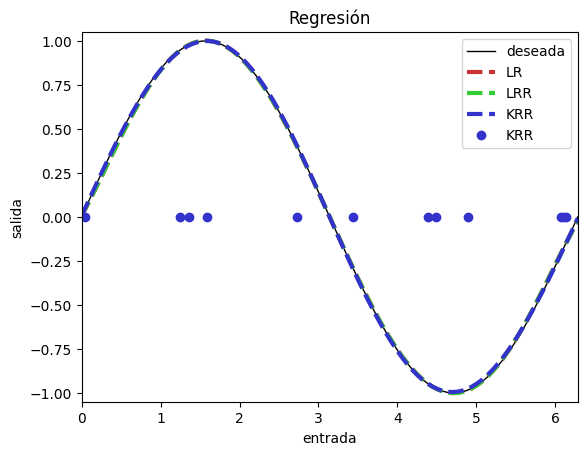

In [5]:
# Representación de la salida estimada

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, 'k-', label='deseada', lw = 1)
plt.plot(X, y_lr, '--', color = (0.8, 0.2, 0.2), label = 'LR', lw = 3)
plt.plot(X, y_lrr, '--', color = (0.2, 0.8, 0.2), label = 'LRR', lw = 3)
plt.plot(X, y_krr, '--', color = (0.2, 0.2, 0.8), label = 'KRR', lw = 3)
plt.plot(X_train, np.zeros((12,1)), 'o', color = (0.2, 0.2, 0.8), label = 'KRR', lw = 3)

plt.xlim([0.0, X.max(0)])
plt.ylim([-1.05, 1.05])
plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('Regresión')
plt.legend(loc="upper right")

### Implementación de funciones en la manera "manual"

In [6]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt

In [7]:
def calculate_error(y_true, y_pred):
    mse = np.square(np.subtract(y_true, y_pred)).mean()
    rmse = np.sqrt(mse)                     # Error cuadrático medio
    mae = np.mean(np.abs(y_true - y_pred))  # Error absoluto medio
    return mse, rmse, mae

In [8]:
def training(N = 20, seed = 4):
    rng = np.random.RandomState(seed)
    X_train = rng.uniform(0, np.pi * 2.0, N)[:, np.newaxis]
    y_train = np.sin(X_train)
    return X_train, y_train

In [9]:
def addones(XX):
    return np.concatenate([np.ones((XX.shape[0], 1)), XX], axis = 1)

In [10]:
def train_linear_models(X_train, y_train, M = 5, l = 0.001):
    XX = X_train
    
    for p in range(2, M + 1, 1):
        powers_of_X = X_train**p
        XX = np.concatenate([XX, powers_of_X], axis = 1)
    
    XX = addones(XX)
    Y = y_train

    # Regresión lineal sin regularización
    Wlr = np.linalg.inv(XX.T.dot(XX)).dot(XX.T).dot(Y)

    # Regresión lineal con regularización
    I = np.eye(XX.shape[1])

    Wlrr = np.linalg.inv(XX.T.dot(XX) + l * I).dot(XX.T).dot(Y)
    
    return Wlr, Wlrr

In [11]:
def train_nonlinear_model(X_train, y_train, lk = 0.001, gamma = 0.1):
    K = rbf_kernel(X_train, X_train, gamma = gamma)  # matriz kernel de train
    In = np.eye(K.shape[0])  # matriz identidad
    alpha = np.linalg.inv(K + lk * In).dot(y_train)  # pesos del modelo
    
    return alpha

In [12]:
def testing(N = 100, M = 5):
    
    X = np.linspace(0, np.pi * 2.0, N)[:, np.newaxis]

    y = np.sin(X)
    
    XX_test = X
    
    for p in range(2, M + 1):
        XX_test = np.concatenate([XX_test, X ** p], axis = 1)
    XX_test = addones(XX_test)
    
    return X, y, XX_test

In [13]:
def predictions(XX_test, Wlr, Wlrr, X, X_train, gamma, alpha):
    y_lr = XX_test.dot(Wlr) # predicción modelo lineal sin regularizar
    y_lrr = XX_test.dot(Wlrr) # predicción modelo lineal regularizado

    K_test = rbf_kernel(X, X_train, gamma = gamma) # matriz kernel de test para kernel ridge
    y_krr = K_test.dot(alpha) # predicción kernel ridge
    
    return y_lr, y_lrr, y_krr

In [14]:
import os

def plot_estimated_output(X, y, y_lr, y_lrr, y_krr, X_train, N_train, N_test, M, gamma, l, lk, save = True, plot = True):
    
    plt.figure(figsize = (8, 6))
    plt.plot(X, y, 'k-', label='deseada', lw = 1)
    plt.plot(X, y_lr, '--', color=(0.8, 0.2, 0.2), label = f'LR M = {M}', lw = 3)
    plt.plot(X, y_lrr, '--', color=(0.2, 0.8, 0.2), label = f'LRR M = {M}, l = {l}', lw = 3)
    plt.plot(X, y_krr, '--', color=(0.2, 0.2, 0.8), label = f'KRR gam = {gamma}, lk = {lk}', lw = 3)
    plt.plot(X_train, np.zeros((N_train, 1)), 'o', color = (0.2, 0.2, 0.8), label = 'X_train', lw = 3)

    plt.xlim([0.0, X.max()])
    plt.ylim([-1.05, 1.05])
    plt.xlabel('entrada')
    plt.ylabel('salida')
    plt.title('Regresión')
    plt.legend(loc = "upper right")
    
    mselr, rmselr, maelr = calculate_error(y, y_lr)
    mselrr, rmselrr, maelrr = calculate_error(y, y_lrr)
    msekrr, rmsekrr, maekrr = calculate_error(y, y_krr)
    plt.text(5.1, 0.45, f'RMSE (linear): {rmselr:.4f}', ha = 'center', va = 'center', fontsize = 12, color = 'blue')
    plt.text(5.1, 0.35, f'RMSE (linear [reg]): {rmselrr:.4f}', ha = 'center', va = 'center', fontsize = 12, color = 'blue')
    plt.text(5.1, 0.25, f'RMSE (nonlinear): {rmsekrr:.4f}', ha = 'center', va = 'center', fontsize = 12, color = 'blue')
    
    if save:
        # Crear carpeta 'images' si no existe
        if not os.path.exists('images_kernel'):
            os.makedirs('images_kernel')
                
        filename = f"Regresion_Ntrain{N_train}_Ntest{N_test},M{M}_l{l}_lk{lk}_gamma{gamma}.png"
        filepath = f"images_kernel/{filename}"  # Carpeta 'images'
        plt.savefig(filepath)
    
    if plot:    
        plt.show()
        
    plt.close()  # Cerrar la figura después de guardar

In [15]:
def full_pipeline(N_train = 20, N_test = 100, seed = 4, M = 5, l = 0.001, lk = 0.001, gamma = 0.1, plot = True):
    
    # Generación de datos de entrenamiento
    X_train, y_train = training(N_train, seed)

    # Entrenamiento de modelos lineales
    Wlr, Wlrr = train_linear_models(X_train, y_train, M, l)

    # Entrenamiento del modelo no lineal
    alpha = train_nonlinear_model(X_train, y_train, lk, gamma)

    # Generación de datos de prueba
    X, y, XX_test = testing(N_test, M)

    # Predicciones
    y_lr, y_lrr, y_krr = predictions(XX_test, Wlr, Wlrr, X, X_train, gamma, alpha)

    # Representación de la salida estimada
    plot_estimated_output(X, y, y_lr, y_lrr, y_krr, X_train, N_train, N_test, M, gamma, l = l, lk = lk, plot = plot)
    
    # añadir rmse a cada una para ponerla.
    return M

Se han graficado muchas combinaciones posibles con el objetivo de que se aprecien mejor los detalles.

In [16]:
# Podemos sacar gráficos para distintas combinaciones de valores que pongamos

M_values = [1, 2, 3, 5, 10]
l_values = [0.001, 20]
lk_values = [0, 0.001, 20]
gamma_values = [0.01, 0.1, 100]

for M in M_values:
    for gamma in gamma_values:
        for l in l_values:
            for lk in lk_values:

                full_pipeline(N_train = 20, N_test = 100, M = M, l = l, lk = lk, gamma = gamma, plot = False)

### Resultados obtenidos para M = 1

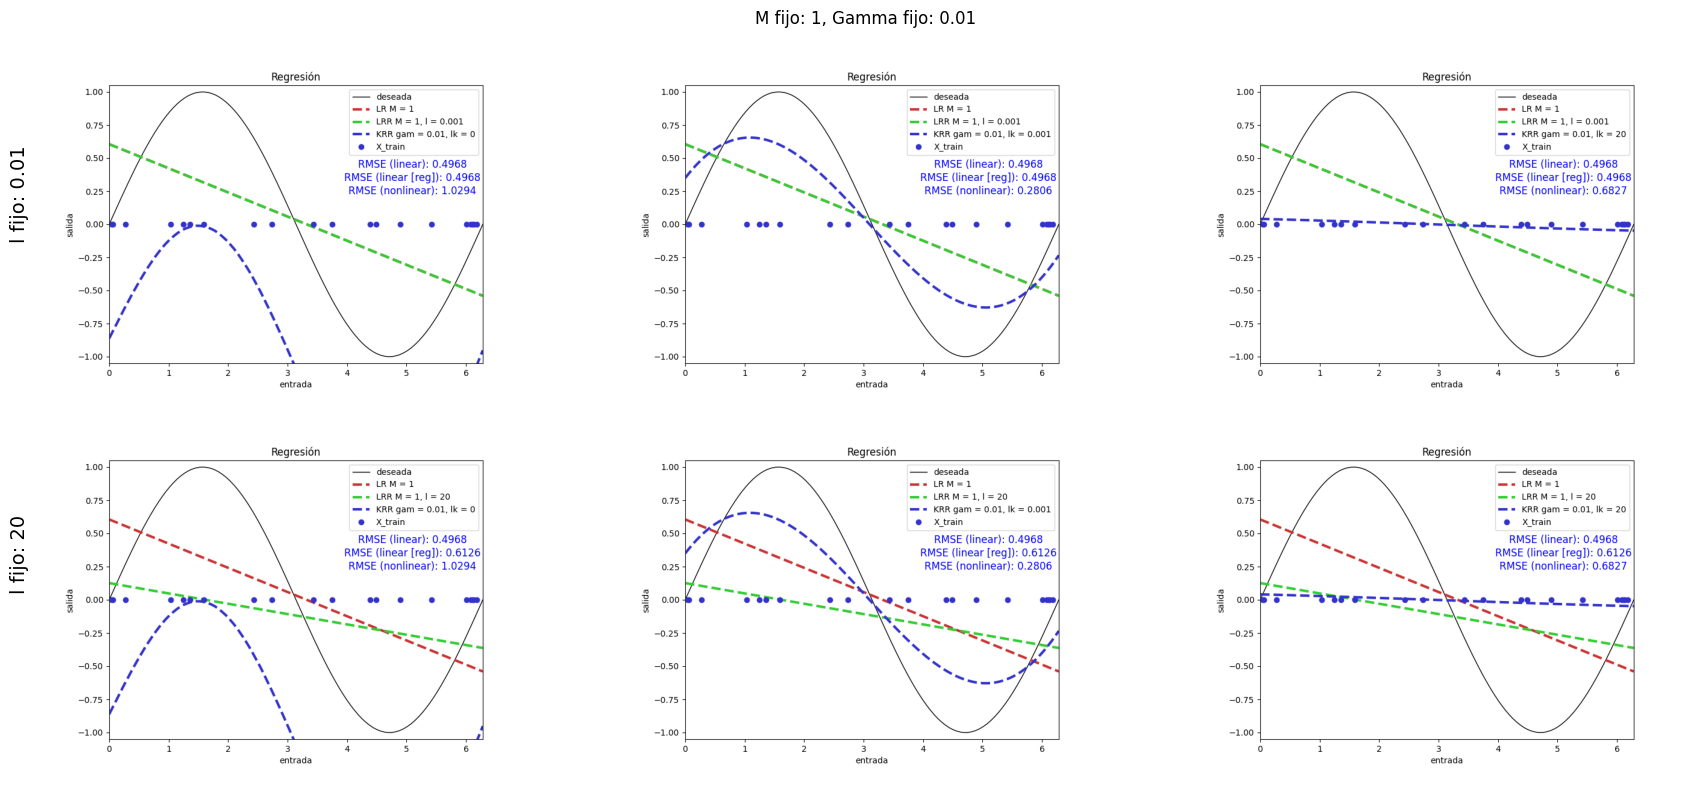

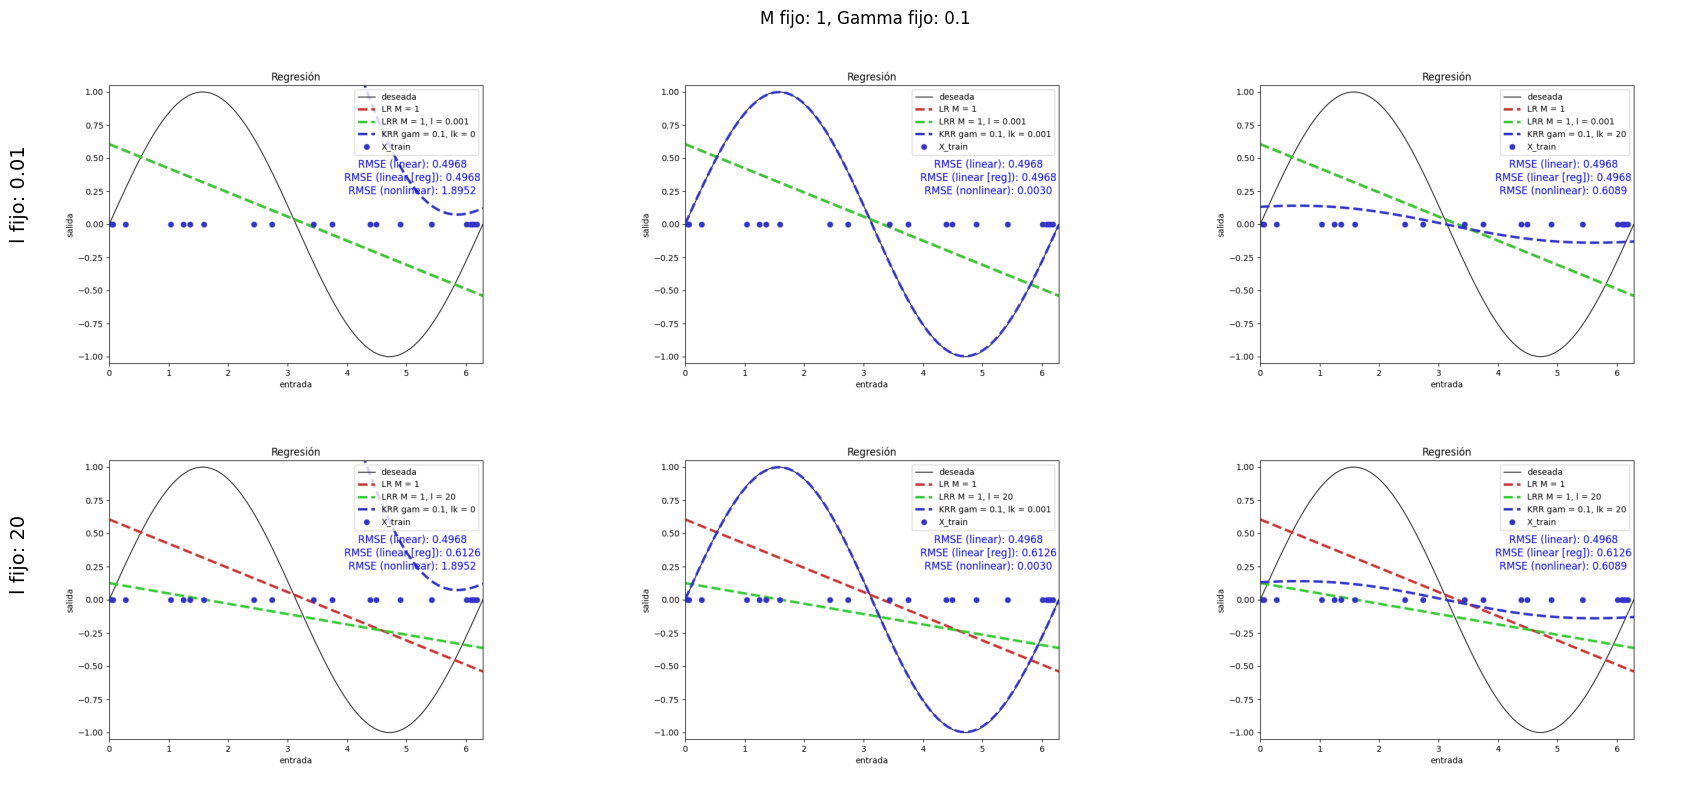

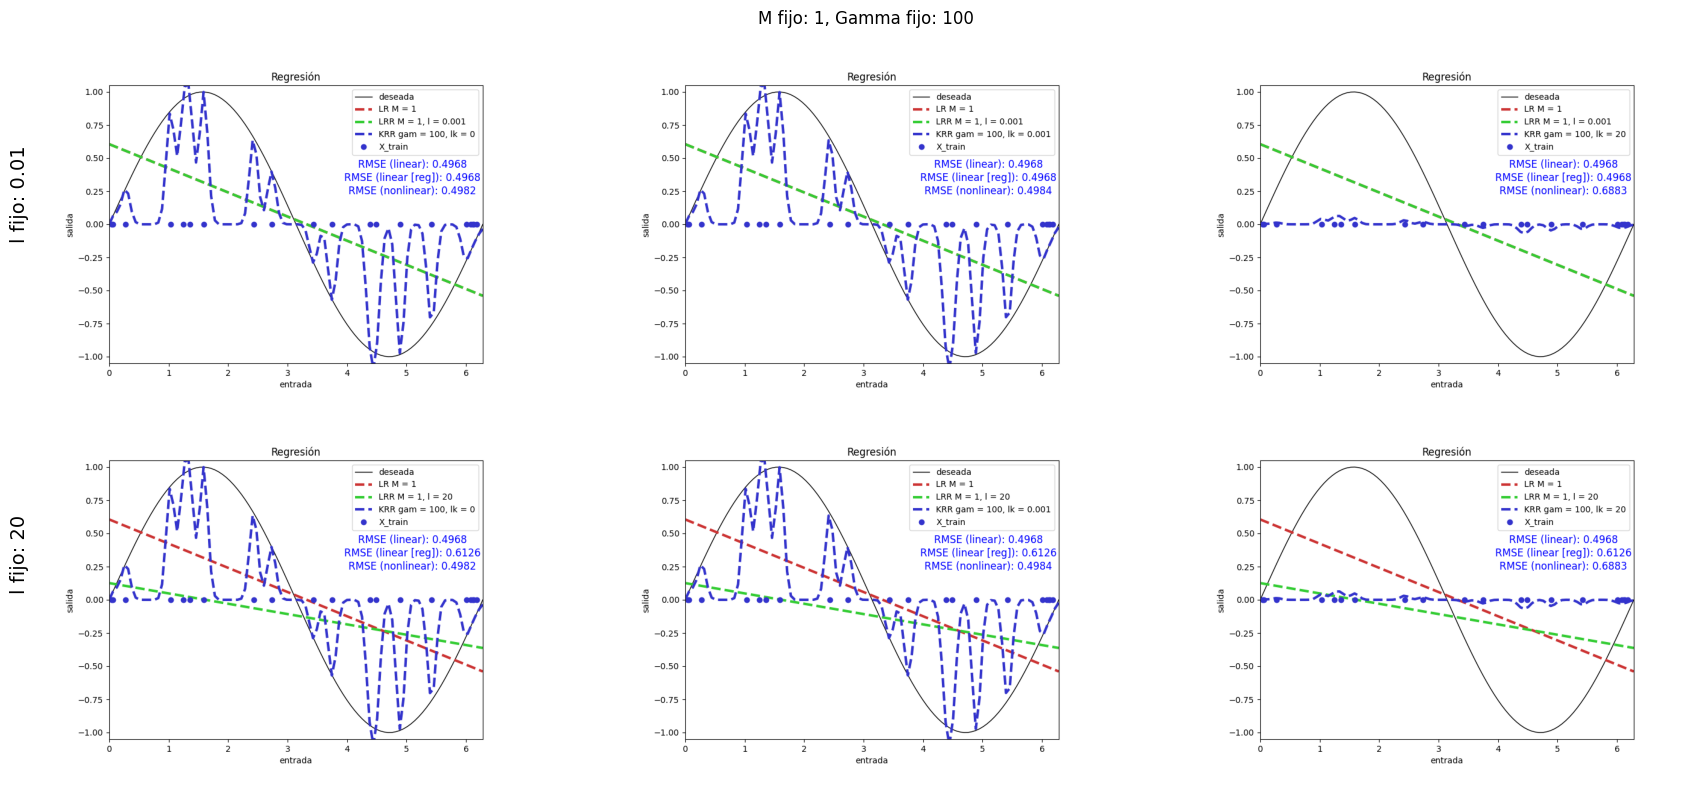

In [17]:
import os
import matplotlib.pyplot as plt
from PIL import Image

directory = 'images_kernel/'  
image_files = [file for file in os.listdir(directory) if file.endswith('.png') and 'M1' in file]

group_size = 6
num_groups = (len(image_files) + group_size - 1) // group_size

gamma_values = [0.01, 0.1, 100]

for group, gamma in zip(range(num_groups), gamma_values):
    start_idx = group * group_size
    end_idx = min((group + 1) * group_size, len(image_files))
    current_images = image_files[start_idx:end_idx]

    num_images = len(current_images)
    num_cols = 3  
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i, image_file in enumerate(current_images):
        img = Image.open(os.path.join(directory, image_file))
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(img)
        ax.axis('off')

    # Definir el valor fijo de l para cada columna
    l_values = [0.01, 20]
    l_left = l_values[0]  # l fijo para la primera columna
    l_right = l_values[1]  # l fijo para la segunda columna

    # Agregar el título al grupo de subplots con los valores fijos de M, l y gamma
    fig.suptitle(f'M fijo: 1, Gamma fijo: {gamma}')

    # Agregar información sobre el valor fijo de l en cada columna
    fig.text(0.03, 0.75, f'l fijo: {l_left}', ha='center', va='center', rotation = 90, fontsize = 14)
    fig.text(0.03, 0.3, f'l fijo: {l_right}', ha='center', va='center', rotation = 90, fontsize = 14)

    plt.tight_layout()
    plt.show()

En primer lugar, vemos que para el caso de regresión lineal no se obtienen resultados adecuados teniendo un polinomio de orden 1 ($M = 1$), que sería el caso lineal. Para una regularización pequeña como la mostrada las líneas aparecen superpuestas con el caso sin regularización, por lo que no se observa. Además, vemos como una regularización elevada para esta regresión lineal ($l = 20$) incluso empeora los resultados. En el caso de regularización elevada lo que estaríamos haciendo es dando más importancia a la identidad en la expresión de los pesos, lo que llevaría a que (dado que se invierte) obtener pesos menores. Esto hace que el modelo sea más "restringido", es decir, menos sensible a los detalles de los datos de entrenamiento y más sesgado hacia una solución más simple.

Por otra parte, vemos cómo para el modelo no lineal en el que kernelizamos se obtienen resultados mucho mejores para el caso en que $\gamma = 0.1$ ($\gamma$ es lo que sería el 1 / 2 $\sigma^2$ que vimos en teoría para la RBF function). Un gamma pequeño implicaría que el alcance de influencia de los ejemplos de entrenamiento es grande. Esto lleva a modelos con fronteras de decisión más suaves y extendidas. Se obtienen modelos de menor complejidad.
En el caso de gamma grande encontramos modelos con fronteras de decisión más ajustadas y específicas, lo que hace que se tienda a ajustar más a los datos resultando en overfitting. Esto explica la complejidad del modelo obtenida.

Dado que ya hemos analizado el caso no lineal de kernel (variación de $\gamma$ y $lk$), en las siguientes figuras no se iterará sobre gamma por cuestiones de espacio.

### Resultados obtenidos para M = 2

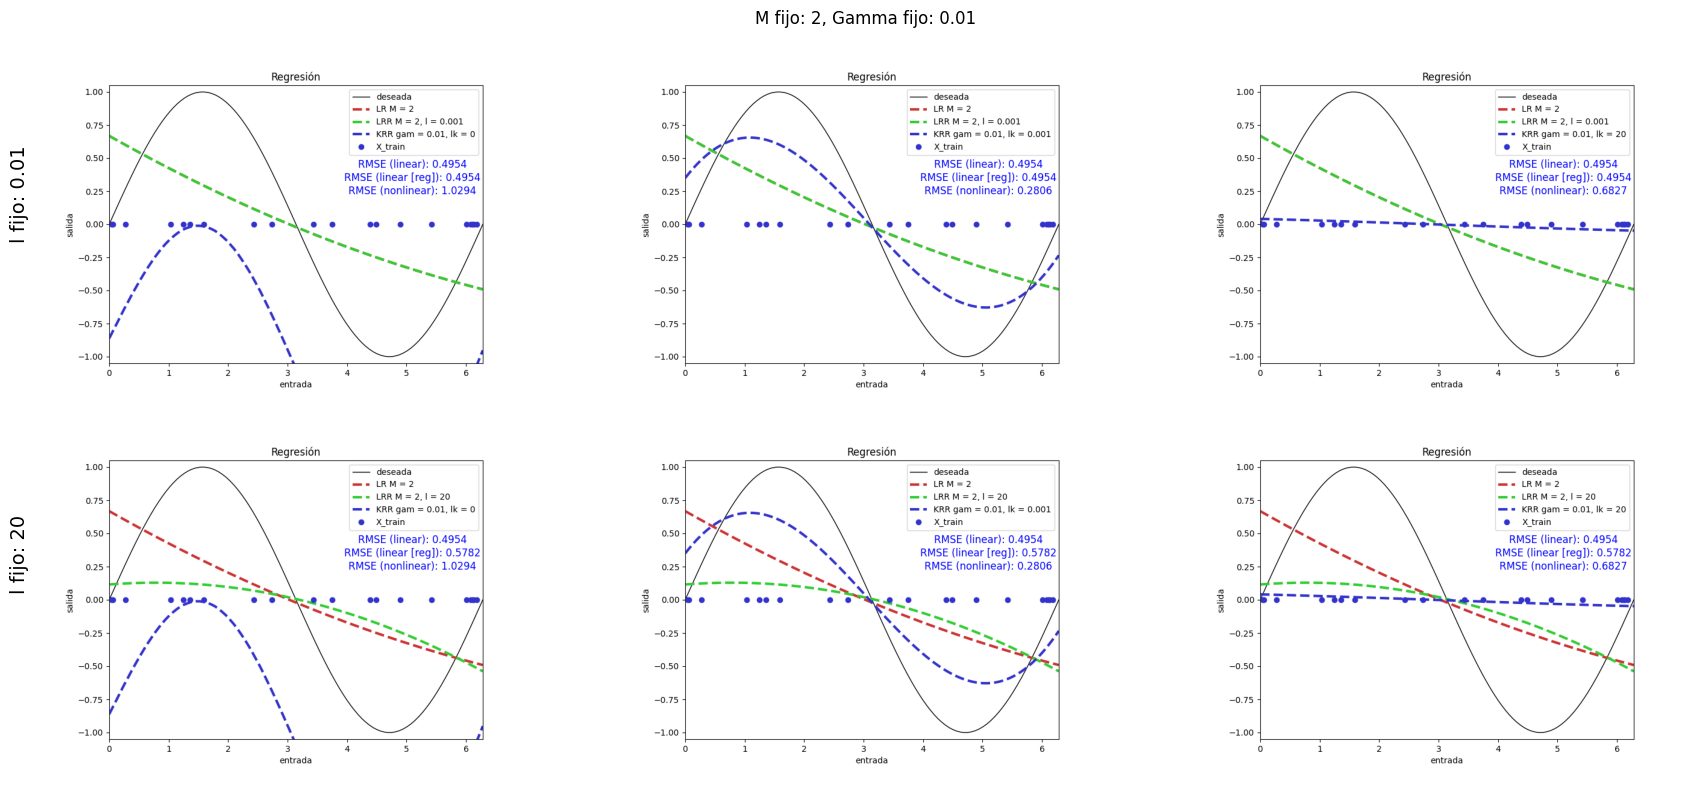

In [18]:
import os
import matplotlib.pyplot as plt
from PIL import Image

directory = 'images_kernel/'  
image_files = [file for file in os.listdir(directory) if file.endswith('.png') and 'M2' in file]

group_size = 6
num_groups = (len(image_files) + group_size - 1) // group_size

gamma_values = [0.01]

for group, gamma in zip(range(num_groups), gamma_values):
    start_idx = group * group_size
    end_idx = min((group + 1) * group_size, len(image_files))
    current_images = image_files[start_idx:end_idx]

    num_images = len(current_images)
    num_cols = 3  
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i, image_file in enumerate(current_images):
        img = Image.open(os.path.join(directory, image_file))
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(img)
        ax.axis('off')

    # Definir el valor fijo de l para cada columna
    l_values = [0.01, 20]
    l_left = l_values[0]  # l fijo para la primera columna
    l_right = l_values[1]  # l fijo para la segunda columna

    # Agregar el título al grupo de subplots con los valores fijos de M, l y gamma
    fig.suptitle(f'M fijo: 2, Gamma fijo: {gamma}')

    # Agregar información sobre el valor fijo de l en cada columna
    fig.text(0.03, 0.75, f'l fijo: {l_left}', ha='center', va='center', rotation = 90, fontsize = 14)
    fig.text(0.03, 0.3, f'l fijo: {l_right}', ha='center', va='center', rotation = 90, fontsize = 14)

    plt.tight_layout()
    plt.show()

Para el caso de modelo lineal con orden de polinomio $M = 2$ (recordemos que hacemos este truco añadiendo variables polinómicas en la matriz de Vandermonde), se obtienen resultados algo mejores, aunque insuficientes todavía.

### Resultados obtenidos para M = 3

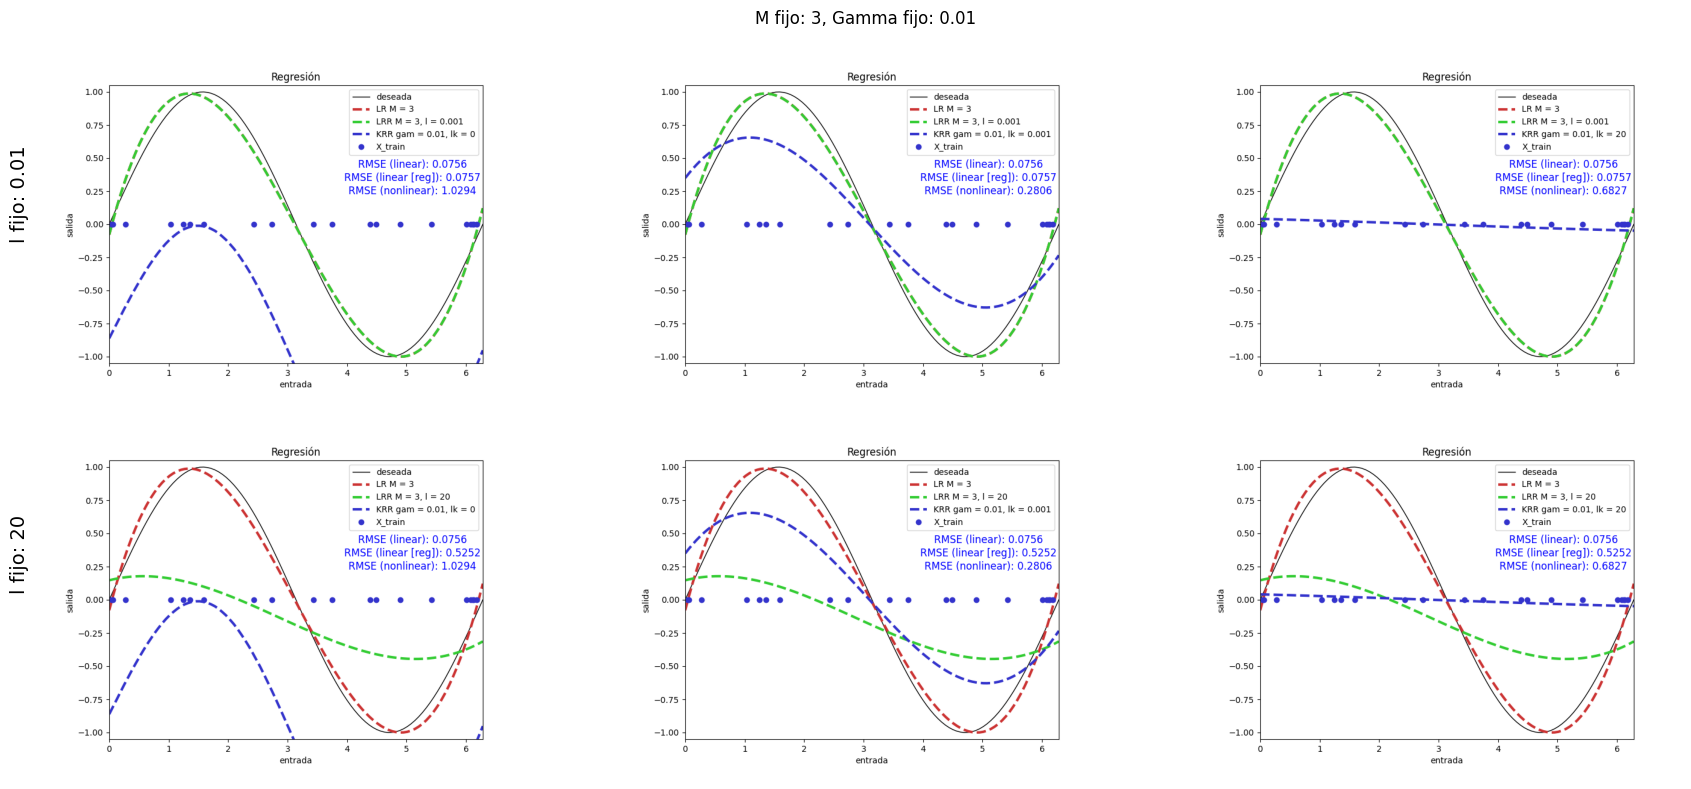

In [19]:
import os
import matplotlib.pyplot as plt
from PIL import Image

directory = 'images_kernel/'  
image_files = [file for file in os.listdir(directory) if file.endswith('.png') and 'M3' in file]

group_size = 6
num_groups = (len(image_files) + group_size - 1) // group_size

gamma_values = [0.01]

for group, gamma in zip(range(num_groups), gamma_values):
    start_idx = group * group_size
    end_idx = min((group + 1) * group_size, len(image_files))
    current_images = image_files[start_idx:end_idx]

    num_images = len(current_images)
    num_cols = 3  
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i, image_file in enumerate(current_images):
        img = Image.open(os.path.join(directory, image_file))
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(img)
        ax.axis('off')

    # Definir el valor fijo de l para cada columna
    l_values = [0.01, 20]
    l_left = l_values[0]  # l fijo para la primera columna
    l_right = l_values[1]  # l fijo para la segunda columna

    # Agregar el título al grupo de subplots con los valores fijos de M, l y gamma
    fig.suptitle(f'M fijo: 3, Gamma fijo: {gamma}')

    # Agregar información sobre el valor fijo de l en cada columna
    fig.text(0.03, 0.75, f'l fijo: {l_left}', ha='center', va='center', rotation = 90, fontsize = 14)
    fig.text(0.03, 0.3, f'l fijo: {l_right}', ha='center', va='center', rotation = 90, fontsize = 14)

    plt.tight_layout()
    plt.show()

Con $M = 3$ ya se obtienen resultados mucho más prometedores. Vemos que la curva del modelo lineal (polinómico) sin regularización empieza a ajustarse a nuestra curva de interés.

### Resultados obtenidos para M = 5

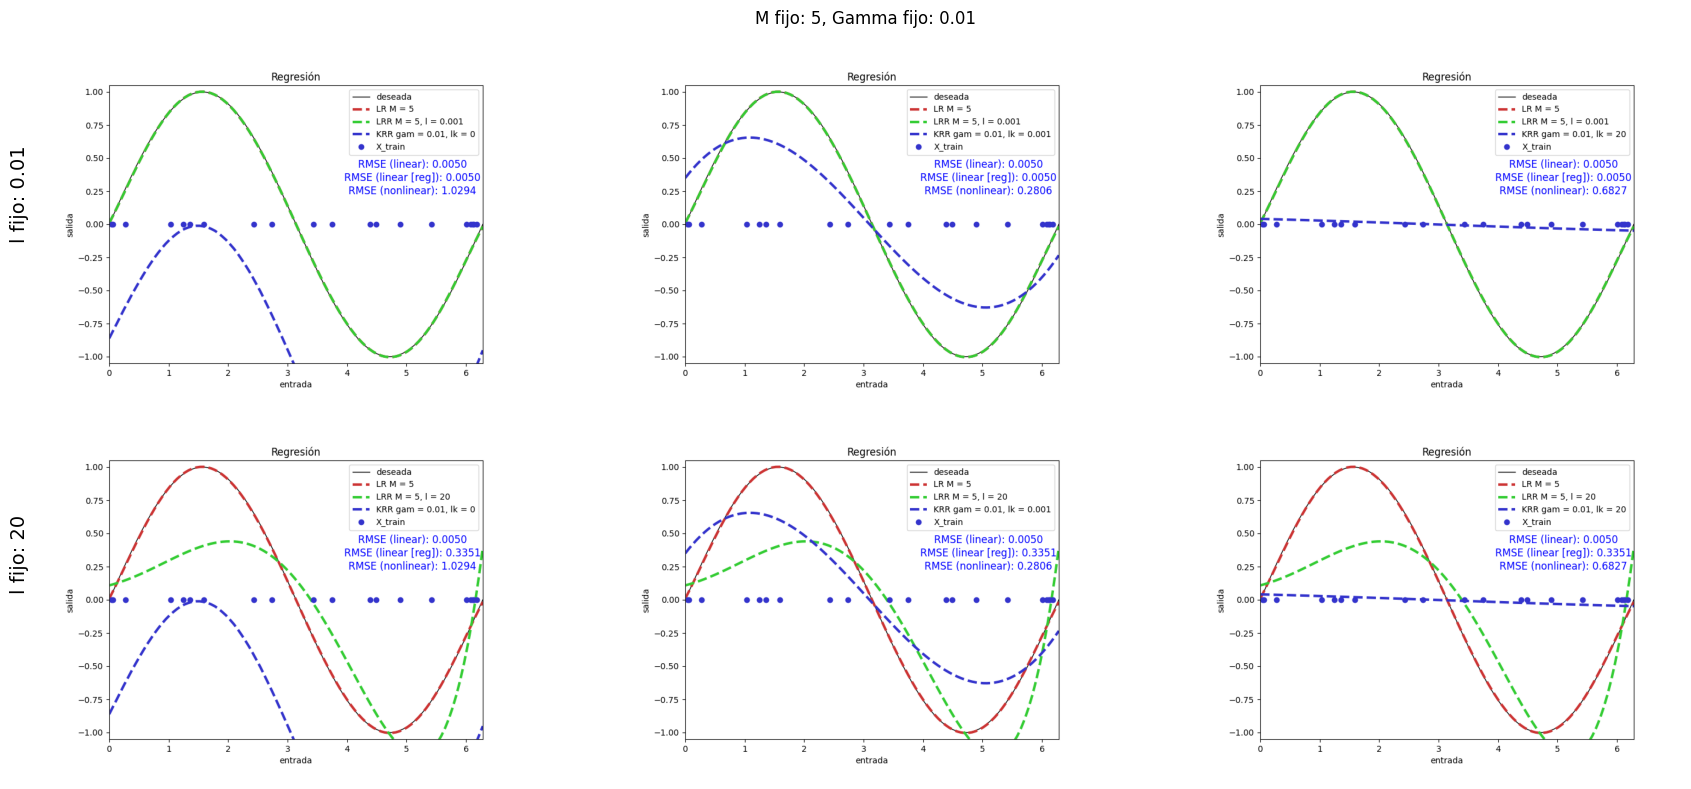

In [20]:
import os
import matplotlib.pyplot as plt
from PIL import Image

directory = 'images_kernel/'  
image_files = [file for file in os.listdir(directory) if file.endswith('.png') and 'M5' in file]

group_size = 6
num_groups = (len(image_files) + group_size - 1) // group_size

gamma_values = [0.01]

for group, gamma in zip(range(num_groups), gamma_values):
    start_idx = group * group_size
    end_idx = min((group + 1) * group_size, len(image_files))
    current_images = image_files[start_idx:end_idx]

    num_images = len(current_images)
    num_cols = 3  
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i, image_file in enumerate(current_images):
        img = Image.open(os.path.join(directory, image_file))
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(img)
        ax.axis('off')

    # Definir el valor fijo de l para cada columna
    l_values = [0.01, 20]
    l_left = l_values[0]  # l fijo para la primera columna
    l_right = l_values[1]  # l fijo para la segunda columna

    # Agregar el título al grupo de subplots con los valores fijos de M, l y gamma
    fig.suptitle(f'M fijo: 5, Gamma fijo: {gamma}')

    # Agregar información sobre el valor fijo de l en cada columna
    fig.text(0.03, 0.75, f'l fijo: {l_left}', ha='center', va='center', rotation = 90, fontsize = 14)
    fig.text(0.03, 0.3, f'l fijo: {l_right}', ha='center', va='center', rotation = 90, fontsize = 14)

    plt.tight_layout()
    plt.show()

### Resultados obtenidos para M = 10

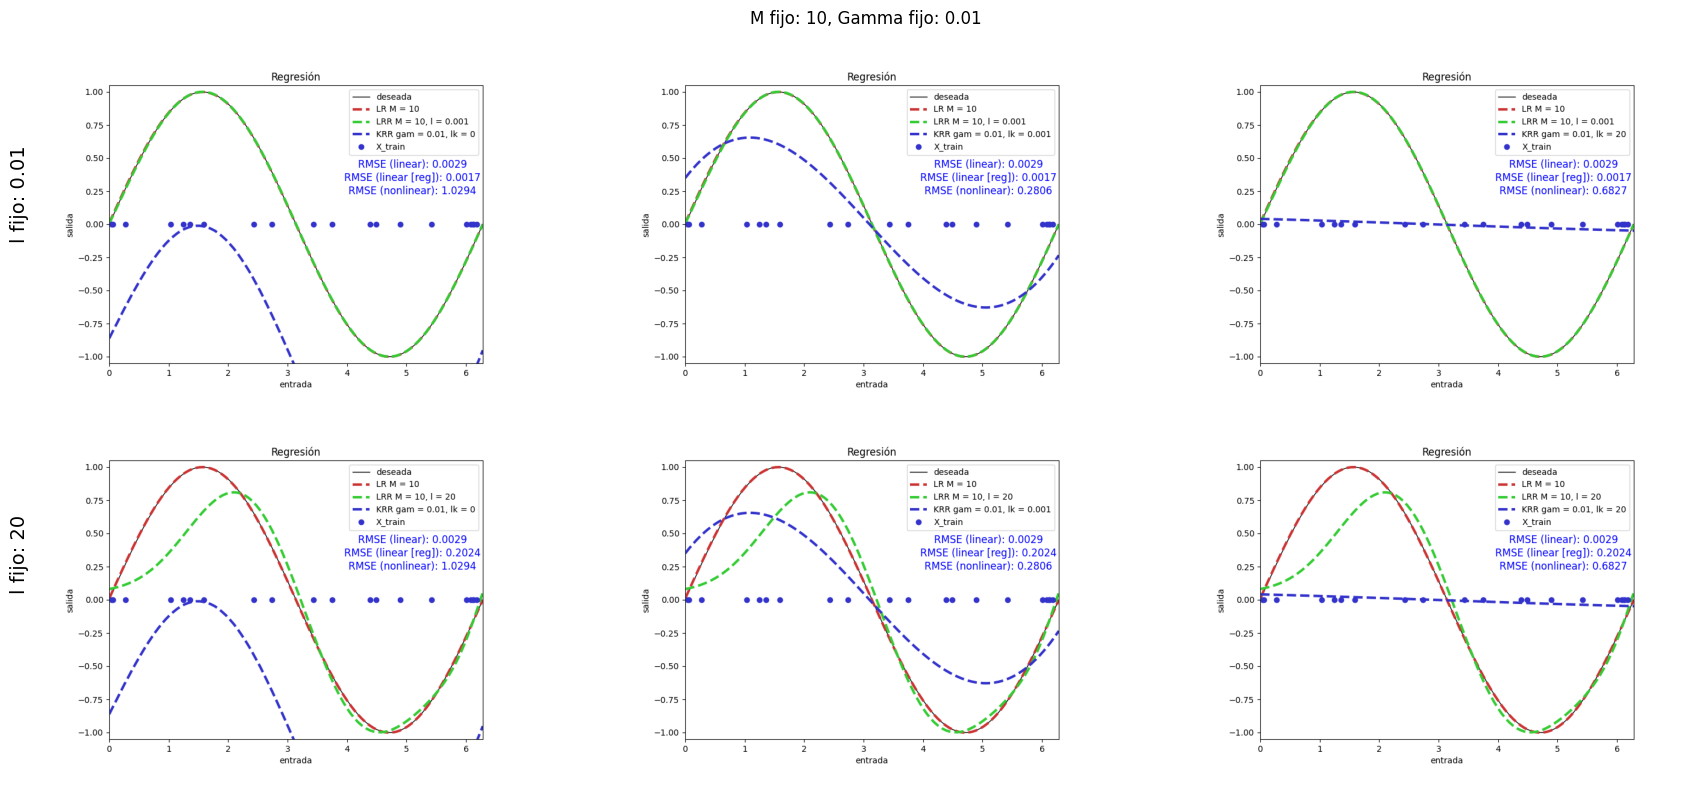

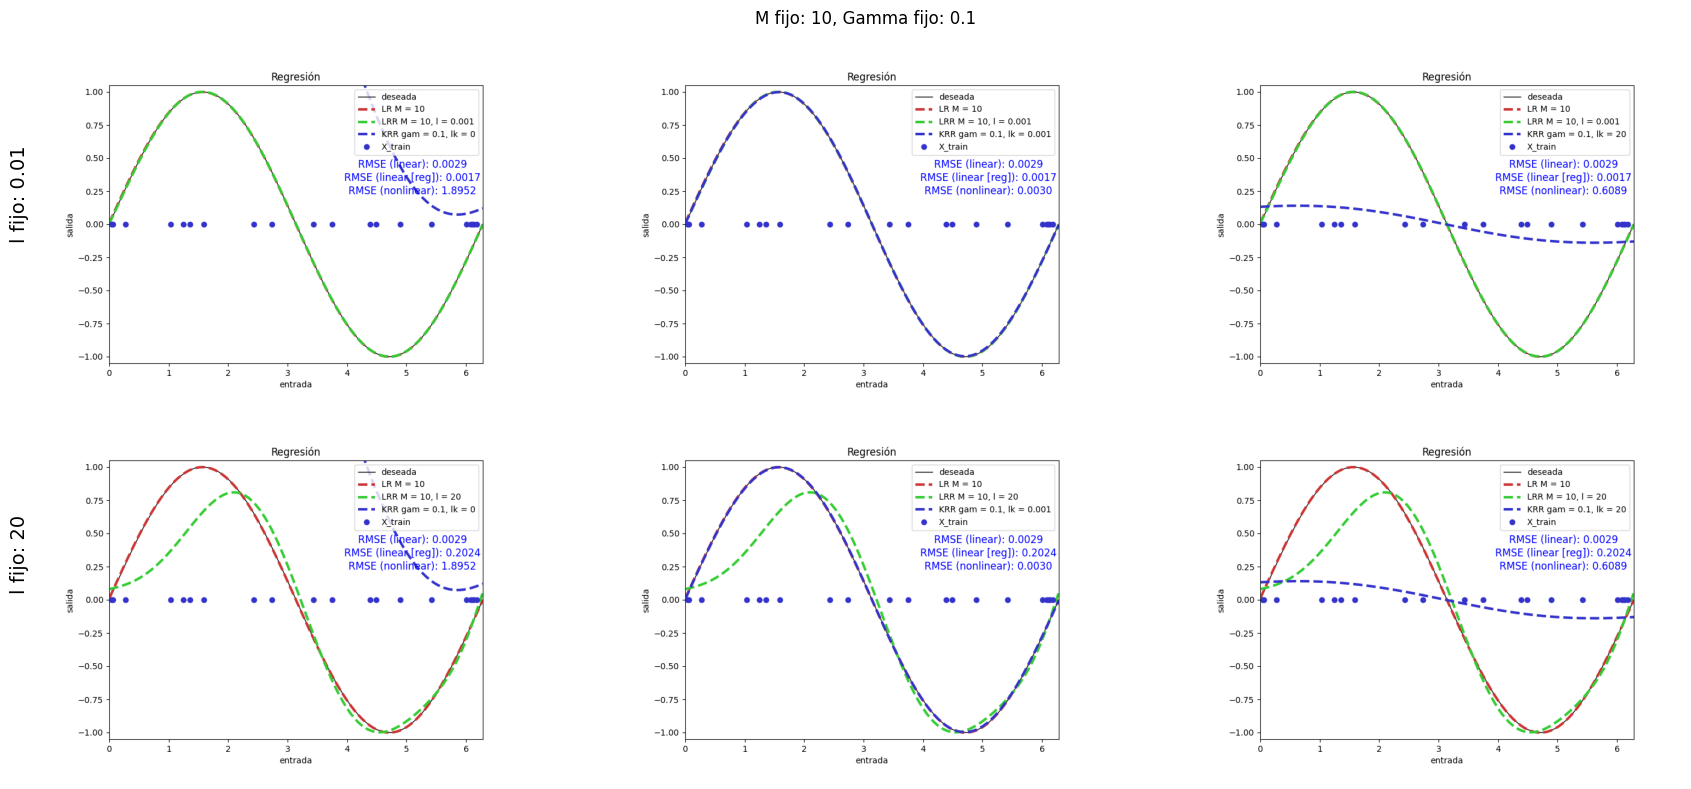

In [21]:
import os
import matplotlib.pyplot as plt
from PIL import Image

directory = 'images_kernel/'  
image_files = [file for file in os.listdir(directory) if file.endswith('.png') and 'M10' in file]

group_size = 6
num_groups = (len(image_files) + group_size - 1) // group_size

gamma_values = [0.01, 0.1]

for group, gamma in zip(range(num_groups), gamma_values):
    start_idx = group * group_size
    end_idx = min((group + 1) * group_size, len(image_files))
    current_images = image_files[start_idx:end_idx]

    num_images = len(current_images)
    num_cols = 3  
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i, image_file in enumerate(current_images):
        img = Image.open(os.path.join(directory, image_file))
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(img)
        ax.axis('off')

    # Definir el valor fijo de l para cada columna
    l_values = [0.01, 20]
    l_left = l_values[0]  # l fijo para la primera columna
    l_right = l_values[1]  # l fijo para la segunda columna

    # Agregar el título al grupo de subplots con los valores fijos de M, l y gamma
    fig.suptitle(f'M fijo: 10, Gamma fijo: {gamma}')

    # Agregar información sobre el valor fijo de l en cada columna
    fig.text(0.03, 0.75, f'l fijo: {l_left}', ha='center', va='center', rotation = 90, fontsize = 14)
    fig.text(0.03, 0.3, f'l fijo: {l_right}', ha='center', va='center', rotation = 90, fontsize = 14)

    plt.tight_layout()
    plt.show()

En el caso de $M = 10$ vemos ya que el modelo es capaz de predecir de manera casi perfecta la curva. Hemos usado 12 datos para el training y 100 para la prueba, pero aún así ha sido capaz de generalizar de manera adecuada.

Vemos cómo la regularización en $l = 0.001$ ayuda ligeramente al modelo lineal, cosa que no se había podido apreciar anteriormente para valores de $M$ más bajos.

El resultado con el modelo no lineal obtiene buenos resultados para el caso comentado anteriormente: $\gamma = 0.1$, $lk = 0.001$, comparables con el modelo lineal con un polinomio muy elevado.